Deep neural netwroks are felxible function estimators that are able to approximate the relation between inputs and outputs given an adequate training dataset. 
For instance such a network can be used to recognize the contents of a image inputs. One example of this data can be recognition of the characters from there pictures written by different fonts. 
In thi project I deployed a convolutional neural network that recognize the character written in the given image inputs.

The dataset is loaded as a .pickle file on my Google drive. Thus it is required to mount on your drive, you can download the data files from the links below:

y_data: https://drive.google.com/file/d/13R9uk38FY6hXJAv2-zLA9H_AsYsjJvGz/view?usp=sharing 

x_data: https://drive.google.com/file/d/1QET-_s47bnGnTK653_dYy1LQB0MgN-m0/view?usp=sharing


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab_Notebooks_new/'  #change dir to your project folder

Mounted at /content/gdrive


Define the dataset class:

In [ ]:
import pickle
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

def one_hot_alphabets(c):
    idx=ord(c)-ord('A')
    y=torch.zeros(1,26)
    y[0,idx]=1
    return y
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

#!dir gdrive/"My Drive"/Colab_Notebooks_new/
#!ls
class AlphabetData(Dataset):
    
    def __init__(self):
        with open("gdrive/My Drive/DeepLearningProjects/Xdata.pkl","rb") as f:
            self.x=pickle.load(f)
        
        with open("gdrive/My Drive/DeepLearningProjects/Ydata.pkl","rb") as f:
            self.y=pickle.load(f).type(torch.int64)
        self.n_samples = self.y.shape[0]
    
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.n_samples

Defining the convolutional model

In [1]:
# Model
n_features=32*32

class DeepModel(nn.Module):
    def __init__(self, num_classes):
        super(DeepModel,self).__init__()
        self.conv1  = nn.Conv2d(1,32,5,padding='same').to(device)
        self.pool   = nn.MaxPool2d(2, stride=2)
        self.conv2  = nn.Conv2d(32,32,5,padding='same').to(device)
        self.conv3  = nn.Conv2d(32,16,5,padding='same').to(device)
        self.linear1 = nn.Linear(256,128).to(device)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128,128).to(device)
        self.linear3 = nn.Linear(128,64).to(device)
        self.linear4 = nn.Linear(64,num_classes).to(device)
        
    def forward(self,x):
        x = x.view(-1,1,32,32)
        z = self.pool(self.relu(self.conv1(x)))
        z = self.pool(self.relu(self.conv2(z)))
        z = self.pool(self.relu(self.conv3(z)))
        z = self.linear1(z.view(-1,z.shape[1]*z.shape[2]*z.shape[3]))
        z = self.relu(z)
        y_pred = self.linear2(z)
        return y_pred
    
model=DeepModel(26)

epoch: 10, loss=0.6840, accuracy= % 80.75
epoch: 20, loss=0.5386, accuracy= % 84.0
epoch: 30, loss=0.5034, accuracy= % 87.5
epoch: 40, loss=0.3299, accuracy= % 91.0
epoch: 50, loss=0.3662, accuracy= % 88.75
epoch: 60, loss=0.2978, accuracy= % 92.25
epoch: 70, loss=0.1703, accuracy= % 95.25
epoch: 80, loss=0.1345, accuracy= % 96.0
epoch: 90, loss=0.1600, accuracy= % 95.0
epoch: 100, loss=0.0982, accuracy= % 97.5


Training the model:

In [ ]:
# loss and optimizer
lr=0.01
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())
batch_size=400
num_epochs = 1000 

# Data loader
dataset=AlphabetData()
dataloader=DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# training loop


for epoch in range(num_epochs):
    
    for i, (inputs,labels) in enumerate(dataloader):
        inputs = inputs.to(device)
        labels=labels.to(device)  
        y_predicted = model(inputs)  
        loss = loss_func(y_predicted,labels)
        
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
    
    if (epoch+1) % 10 ==0:
        with torch.no_grad():
          _,pred = torch.max(y_predicted,1)
          acc=100*sum(labels==pred)/batch_size
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}, accuracy= % {acc}')

Save the model in for later usage
The link for downloading the model:
https://drive.google.com/file/d/1bPIpFnFLhfRl9HUMEQspNiEEoTyYNSXS/view?usp=sharing 

In [3]:
PATH='gdrive/My Drive/DeepLearningProjects/LetterRecongnitionModel'
torch.save(model.state_dict(), PATH)

Load the saved model instead of training

In [ ]:
model.load_state_dict(torch.load(PATH))

In [6]:
# %% Testing
x=dataset.x
y=dataset.y
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i in range(x.shape[0]):
        x_=x[i,:,:].view(-1,n_features).to(device)
        y_=y[i]
        y_pred=model(x_)
        _,pred = torch.max(y_pred,1)
        n_samples += 1
        n_correct += (pred==y_).sum().item()
    acc= 100.0*n_correct/n_samples
    print(acc)

97.96153846153847


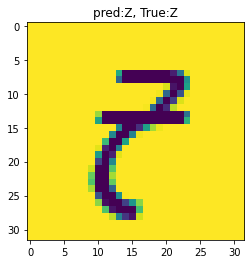

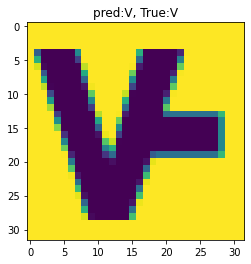

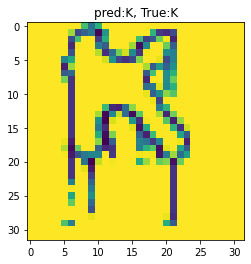

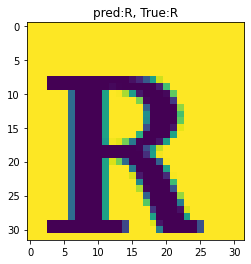

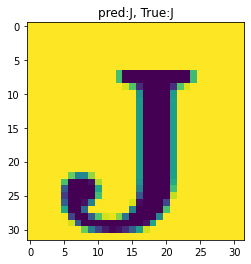

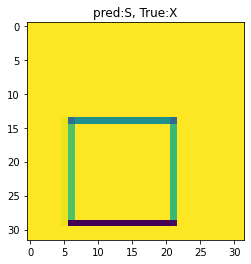

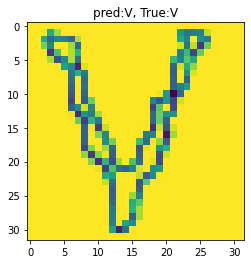

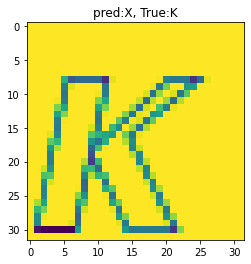

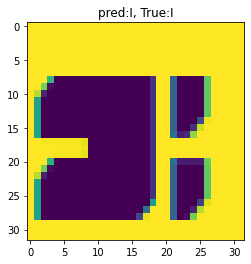

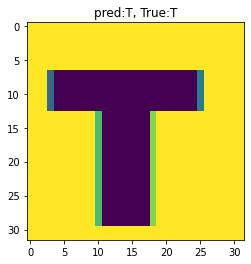

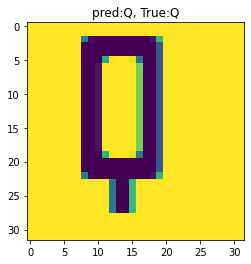

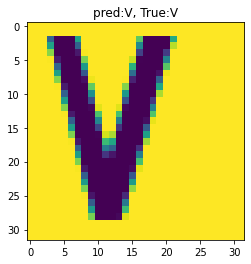

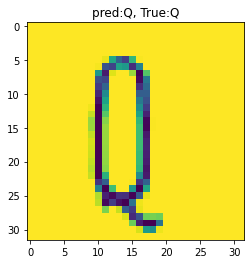

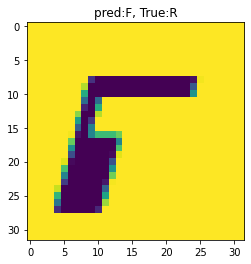

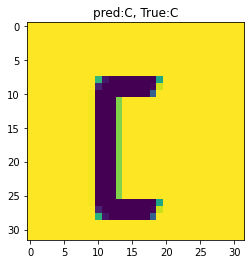

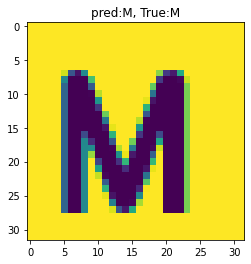

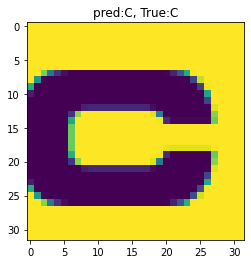

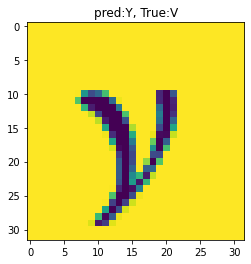

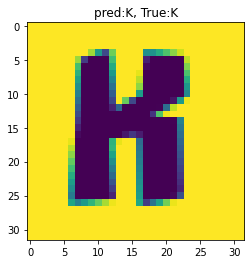

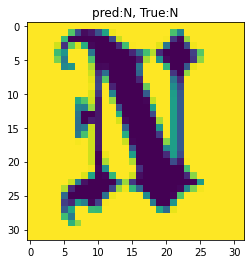

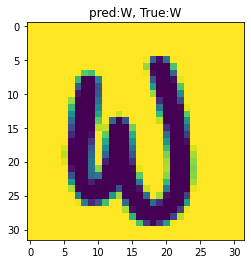

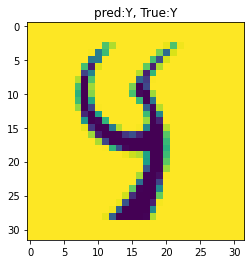

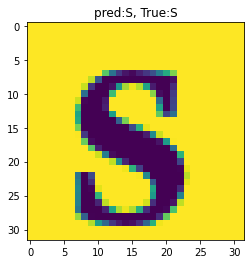

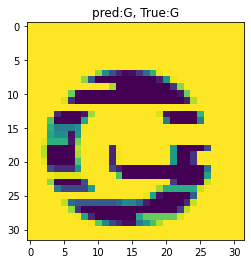

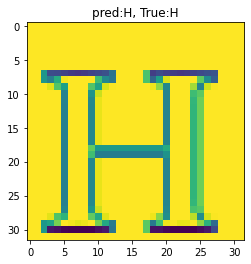

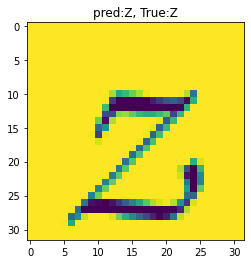

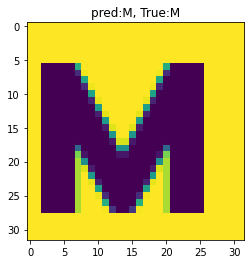

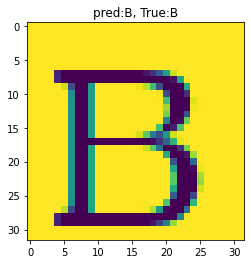

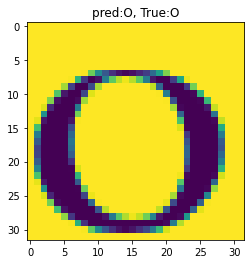

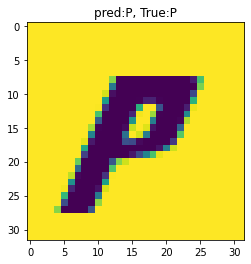

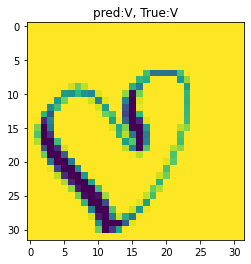

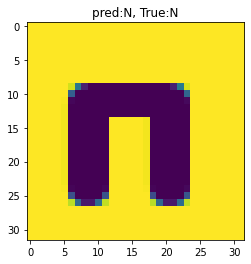

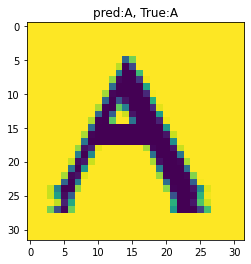

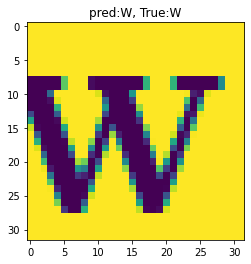

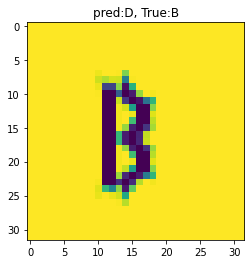

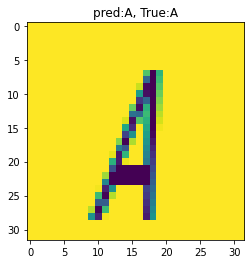

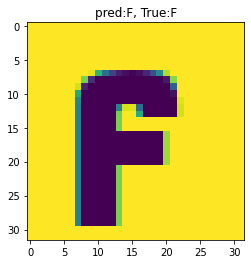

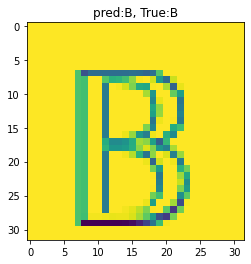

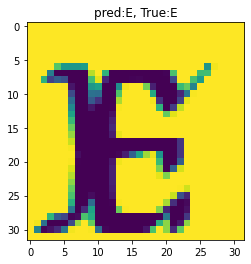

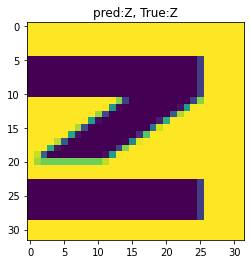

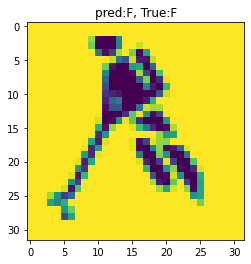

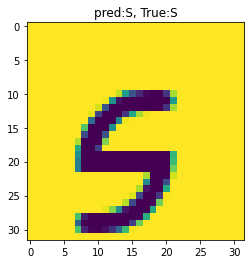

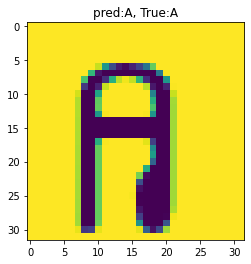

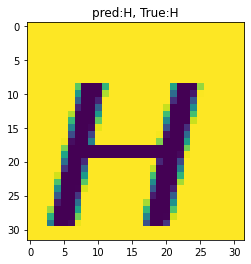

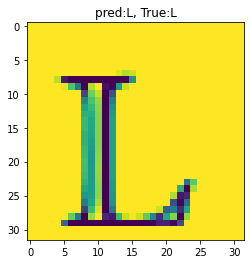

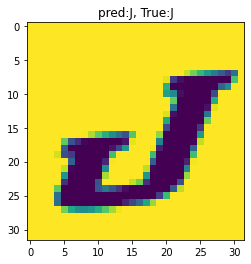

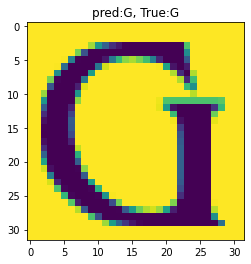

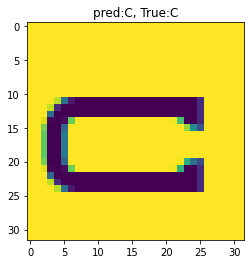

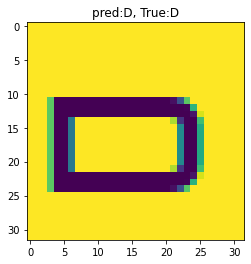

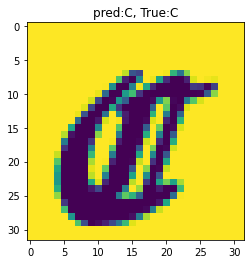

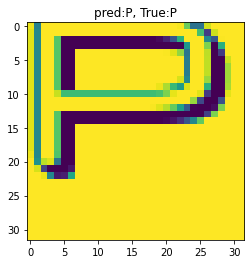

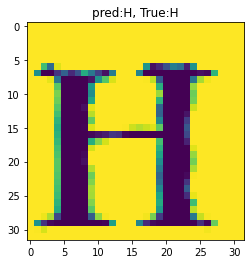

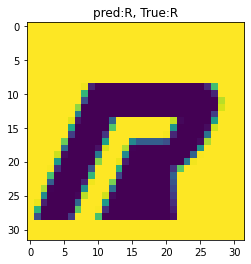

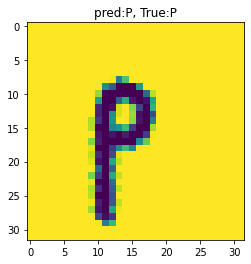

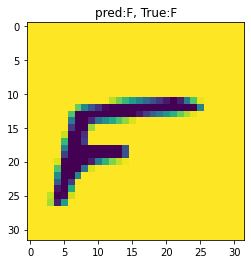

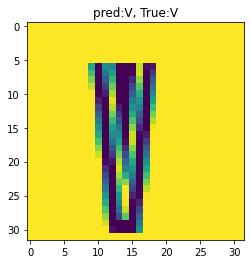

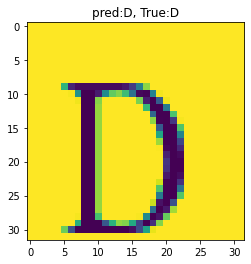

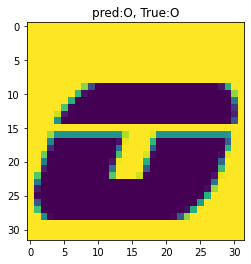

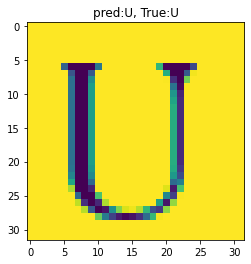

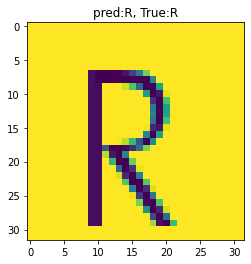

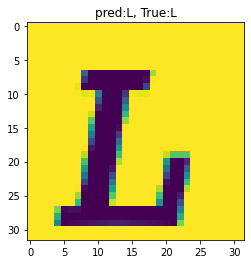

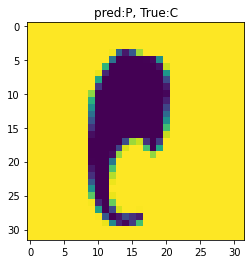

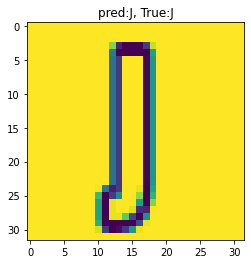

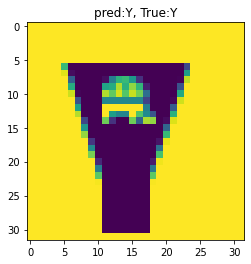

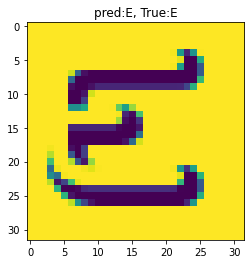

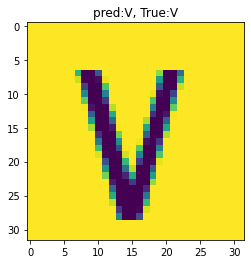

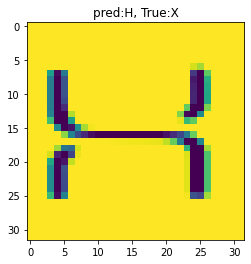

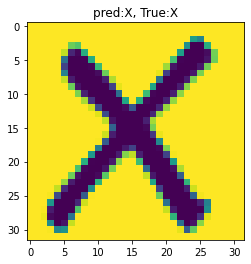

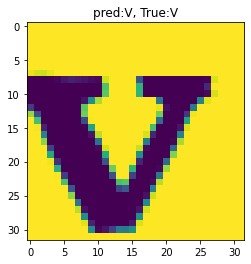

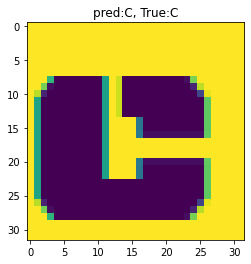

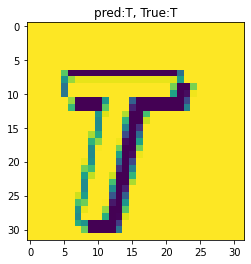

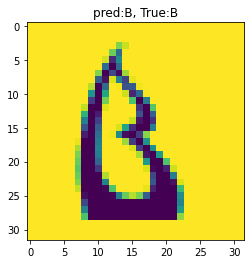

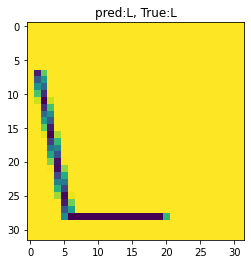

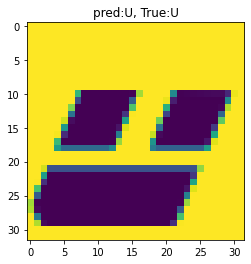

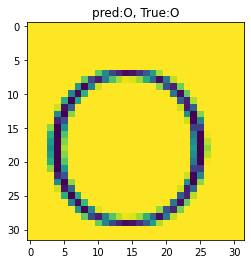

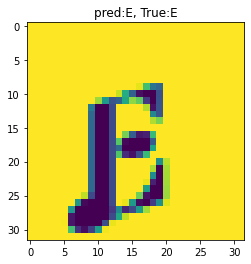

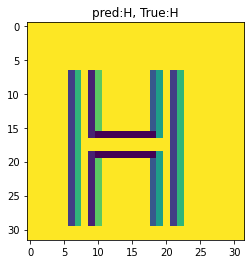

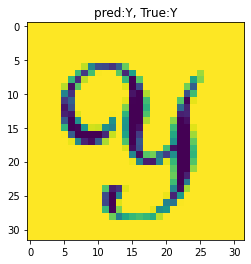

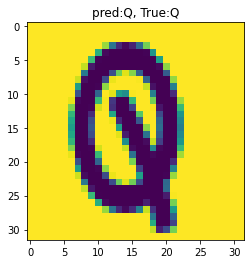

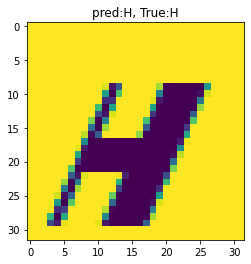

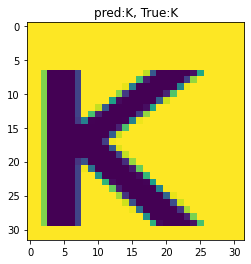

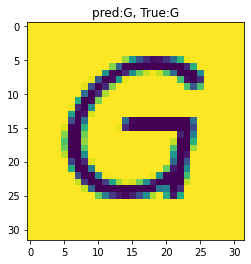

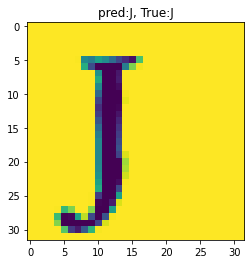

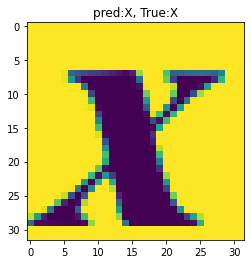

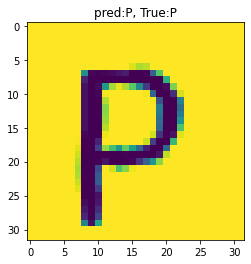

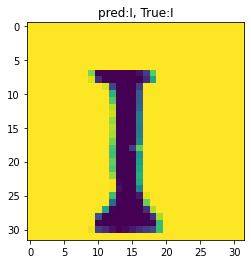

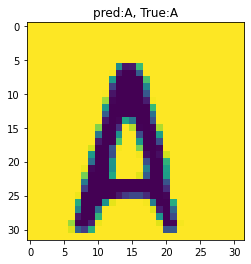

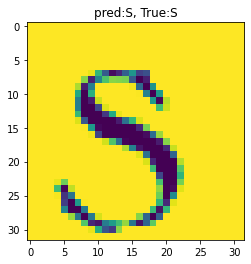

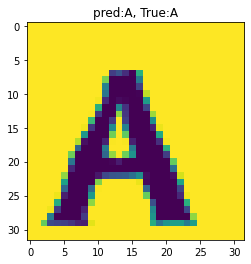

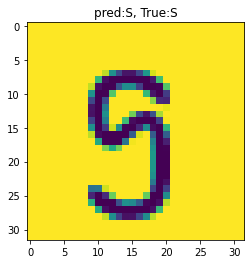

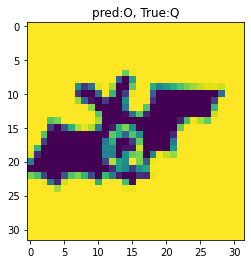

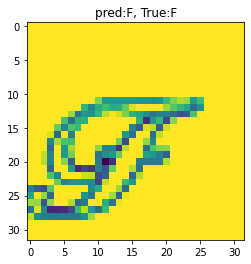

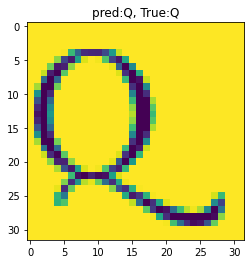

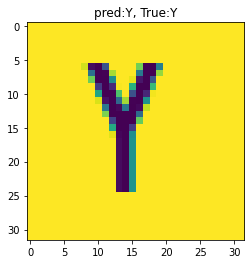

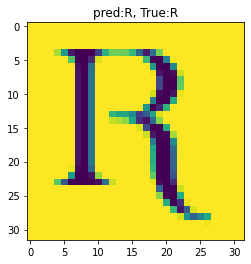

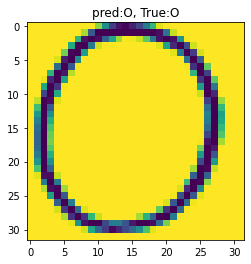

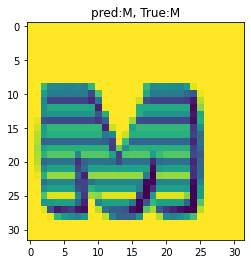

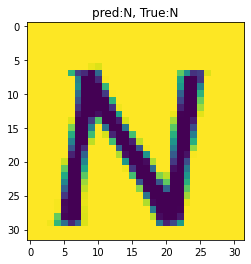

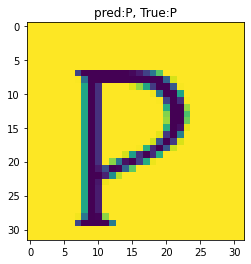

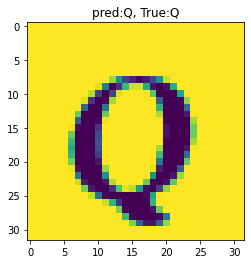

The network accuracy: %92.0


<Figure size 432x288 with 0 Axes>

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i in np.random.choice(x.shape[0],100):
        plt.imshow(x[i,:,:])
        x_=x[i,:,:].view(-1,n_features).to(device)
        y_=y[i]
        y_pred=model(x_)
        _,pred = torch.max(y_pred,1)
        n_samples += 1
        n_correct += (pred==y_).sum().item()
        plt.title("pred:"+chr(pred+ord('A'))+ ", True:"+chr(y_+ord('A')))
        plt.show()
        plt.savefig('sample'+str(i)+chr(y_+ord('A')))
    acc= 100.0*n_correct/n_samples
    print('The network accuracy: %'+str(acc))
